In [2]:
# KM oscillation, synchronization

finalTime = 100 and dt_int = 0.1. This means that the simulation will run for 100 time units with a time step of 0.1. The total number of time steps will be 1000 (since 100/0.1=1000).

In [1]:
!pip install kuramoto

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.5 MB 365.1 kB/s eta 0:02:01
   ---------------------------------------- 0.5/44.5 MB 365.1 kB/s eta 0:02:01
   ---------------------------------------- 0.5/44.5 MB 365.1 kB/s eta 0:02:01
    --------------------------------------- 0.8/44.5 MB 399.6 kB/s eta 0:01:50
    --------------------------------------- 0.8/44.5 MB 399.6 kB/s eta 0:01:50
    --------------------------------------- 0.8/44.5 MB 399.6 kB/s eta 0:01:50
    --------------------------------------- 0.8/44.5 MB 399.6 kB/s eta 0:01:50
    --------------------------------------- 1.0/44.5 MB 387.2 kB/s eta 0:01:53
    --------------

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# import networkx as nx
import seaborn as sns
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity
# import math


import numpy as np
# from numpy.linalg import eig
# from numpy import log as ln

# import cmath
# from cmath import pi, exp
# from sklearn.cluster import KMeans


In [2]:

d_h = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
        [1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [0, -1, -1, -1, 0, 0, 0, 0, -1, 0, -1, -1],
        [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [0, -1, 0, -1, -1, -1, 0, -1, -1, 0, -1, -1],
        [0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0],
        [0, 0, 0, 0, -1, 0, -1, -1, -1, 0, -1, 0],
        [0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
        [0, 0, 0, 0, -1, 1, -1, -1, -1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]])
# PD
d_pd= np.array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 0., -1., -1., -1.,  0.,  0.,  0.,  0., -1.,  0., -1., -1.],
       [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
       [ 0., -1.,  0., -1., -1., -1.,  0., -1., -1.,  0., -1., -1.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -1., -1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0., -1., -1., -1.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.]])

#np.fill_diagonal(d_h, 0)
#np.fill_diagonal(d_pd, 0)

Phase Coherence is a general term that refers to how similar the phases of oscillators are.

Order Parameter specifically quantifies synchronization using both magnitude and phase.

Synchronization Measure R is a specific calculation of magnitude derived from the order parameter, often used interchangeably with r.

In [4]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Define your functions for calculating R and phase coherence (if not already defined):  
def calculate_order_parameter(activity):  
    n_nodes, n_time_steps = activity.shape  # Number of nodes and time points  
    Z = np.zeros(n_time_steps, dtype=complex)  # Initialize the complex sum  

    # Sum over all nodes for each time step  
    for t in range(n_time_steps):  
        Z[t] = np.sum(np.exp(1j * activity[:, t])) / n_nodes  
    
    return Z  

def calculate_synchronization_measure(activity):  
    Z = calculate_order_parameter(activity)  
    R = np.abs(Z)  # Magnitude of the order parameter  
    return R  

def calculate_phase_coherence(activity):  
    n_time_steps = activity.shape[1]  
    phase_coherence = np.zeros(n_time_steps)  

    for t in range(n_time_steps):  
        phases = activity[:, t]  
        phase_coherence[t] = np.std(phases)  # Standard deviation of phases becomes a measure of coherence  

    return phase_coherence  

# Coupling factors  
c = coupling_factor  
# Initial angles  
initial_angles = initial_ang  

# Graph adjacency matrix  
graph = d_pd  

# Prepare to store metrics for plotting  
all_R_values = []  
all_phase_coherence_values = []  
all_Z_values = []  

# Run the Kuramoto model for each coupling factor and store metrics  
for i in range(len(c)):  
    # Run the Kuramoto model  
    model = Kuramoto(coupling=c[i], dt=dt_int, T=finalTime, n_nodes=len(graph), natfreqs=freq)  
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)  
    
    # Calculate metrics  
    R = calculate_synchronization_measure(act_mat)  
    phase_coherence = calculate_phase_coherence(act_mat)  
    Z = calculate_order_parameter(act_mat)  
    
    # Store the metrics for each coupling factor  
    all_R_values.append(R)  
    all_phase_coherence_values.append(phase_coherence)  
    all_Z_values.append(Z)  

# Plotting the metrics over time for each coupling factor  
time = np.linspace(0, finalTime, act_mat.shape[1])  # Assuming act_mat has shape (n_nodes, n_time_steps)  

plt.figure(figsize=(20, 15))  

# Plot R, phase coherence, and Z for each coupling factor  
for i in range(len(c)):  
    plt.subplot(len(c), 3, i * 3 + 1)  
    plt.plot(time, all_R_values[i], label=f'c={c[i]}', marker='o', linestyle='-')  
    plt.title('Synchronization Measure R vs Time')  
    plt.xlabel('Time')  
    plt.ylabel('Synchronization Measure R')  
    plt.grid()  
    plt.legend()  

plt.tight_layout()  
plt.show()

NameError: name 'initial_ang' is not defined

# initial angle

Uniform Distribution from 
−
π
−π to 
0.01
+
π
0.01+π

Implications: This might lead to a scenario where most oscillators start out in a similar phase, potentially leading to a quick synchronization. However, the slight bias towards positive angles might create a scenario where they oscillate in a certain direction initially, which could affect the dynamics of synchronization.

In [5]:
# uniform distribution

initial_ang= np.random.uniform(-np.pi, 0.01+np.pi, N)
initial_ang

array([ 0.86147594,  2.51983512,  1.27352514, -0.32094778,  2.94350919,
        1.36579556, -2.37449429, -1.99337819, -0.70944908,  1.68417509,
        3.08667503,  1.44437908])

Uniform Distribution from 
0
0 to 
2
π
2π

Implications: This is generally a better choice for exploring the full dynamics of synchronization. Since the angles are evenly distributed, it allows for a more comprehensive exploration of the synchronization landscape, leading to a more varied response from the system. It can help in observing the full range of behaviors, from complete synchronization to chaotic behavior.

In [69]:
initial_ang= 2* np.pi*np.random.random(N)
initial_ang

array([2.80943038, 1.38474278, 3.53894067, 0.29981695, 0.8091579 ,
       3.76895919, 5.63806897, 0.06141634, 5.63059967, 1.90058785,
       4.93039746, 0.20158077])

For studying Kuramoto oscillators, the second option (uniform distribution from 
0
0 to 
2
π
2π) is typically preferred. This choice provides a more balanced starting point for each oscillator, allowing for a better investigation of the system's dynamics and synchronization properties.

In [28]:
initial_ang= np.array([0.86049727, 5.71260294, 2.70559349, 0.16627142, 3.39909932,
       5.51089723, 5.09564277, 5.02996003, 2.59193458, 2.44126546,
       1.45639185, 3.28601579])

In [33]:
initial_ang=np.array([1.90814013, 2.48993551, 3.86871796, 5.6999115 , 2.41696474,
       1.86643075, 5.62731896, 4.81653169, 4.24987174, 4.35412315,
       1.54308196, 3.21498826])

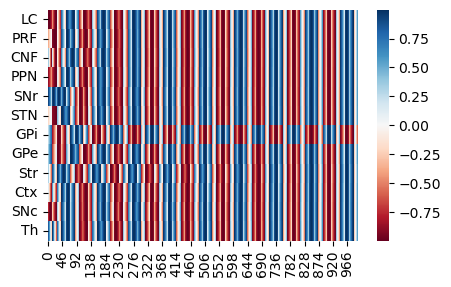

In [6]:
# Healthy
N=12
# f=2
f=20
# f=10
freq = np.ones(N) * f  # intrinsic frequencyruntime=1000

# it is also OK
dt_int=0.1
finalTime=100
# coupling factors
c=1
#initial angle
initial_angles= initial_ang

graph = d_h
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']

act_h=[]

model = Kuramoto(coupling=c, dt=dt_int, T=finalTime, n_nodes=len(graph), natfreqs=freq) #mariia
act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)
activity= act_mat
plt.figure(figsize=(5,3))
act_h.append(act_mat)
sns.heatmap(np.sin(activity), yticklabels=y_axis_labels,cmap='RdBu')
#               cmap='hot')
plt.yticks(rotation=0)
plt.savefig('results/graph_oscil.png')


# oscillation

In [115]:
initial_ang= 2* np.pi*np.random.random(N)
initial_ang

array([2.23418076, 1.22043744, 3.45439752, 0.17233534, 5.70971715,
       0.2105367 , 2.96138098, 2.92073505, 2.13161362, 1.68032382,
       5.24717049, 6.1141076 ])

In [93]:
initial_ang= np.array([1.90814013, 2.48993551, 3.86871796, 5.6999115 , 2.41696474,
       1.86643075, 5.62731896, 4.81653169, 4.24987174, 4.35412315,
       1.54308196, 3.21498826])

In [116]:
# check Frequency: f
# check sampling time: dt_int
N=12

# f=2
f=20
# f=10
freq = np.ones(N) * f  # intrinsic frequencyruntime=1000

# it is also OK
dt_int=0.1
finalTime=100
# dt_int=0.01
# finalTime=10
# # runtime=10000
num_trials=1
# coupling_factor=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
coupling_factor=[0, 0.2, 0.4, 0.6, 0.8, 1]
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']
# subplot coordinations
m=3
n=2

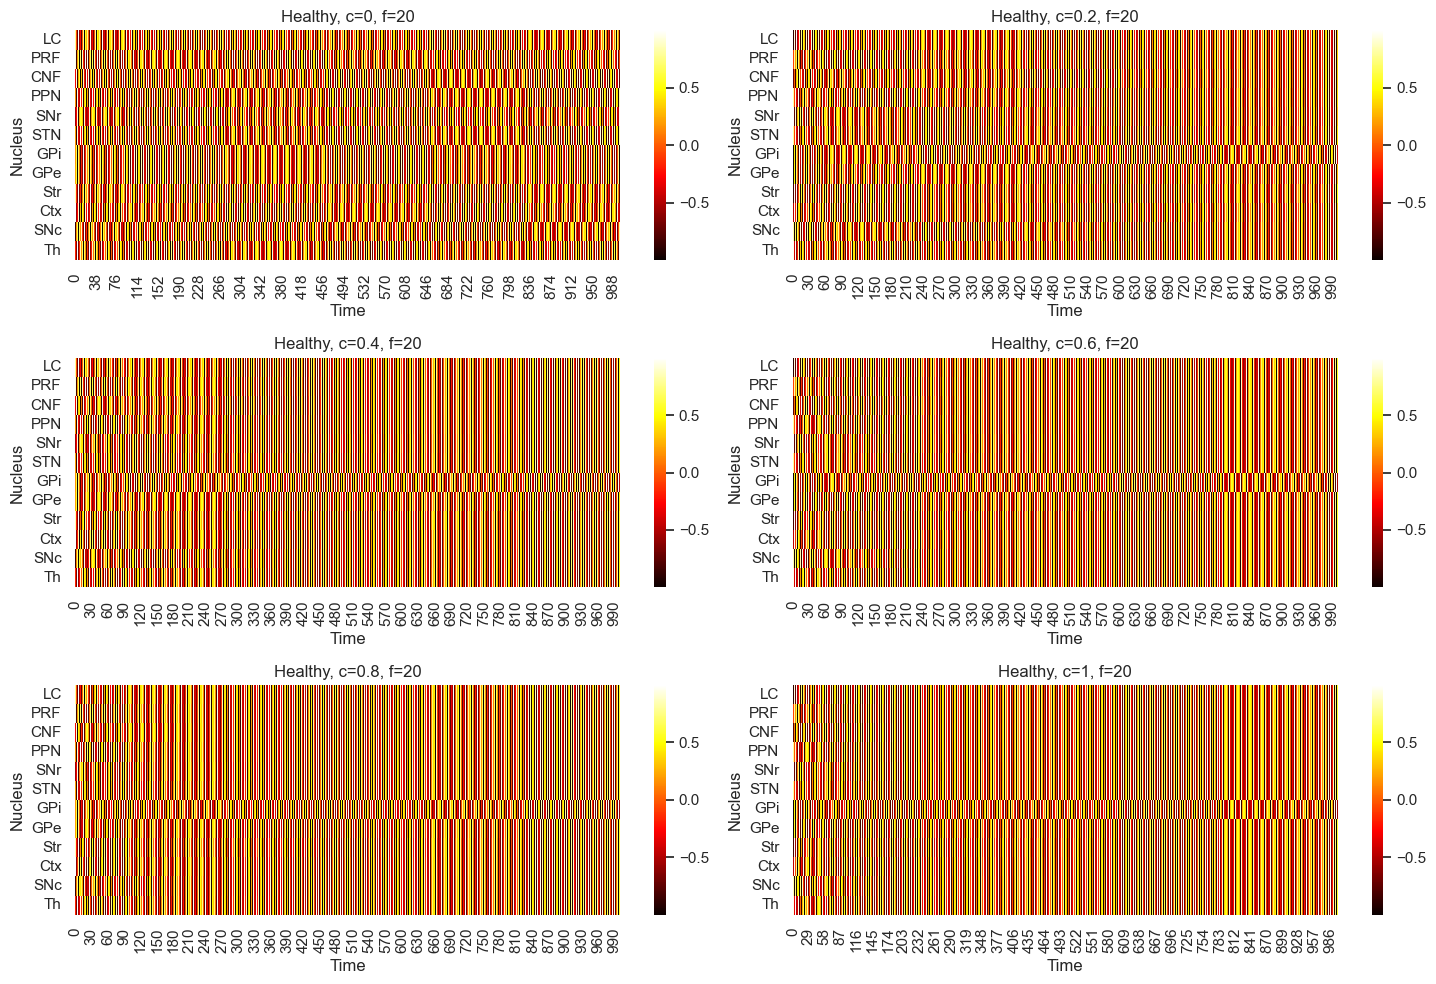

In [117]:
# Healthy

# coupling factors
c=coupling_factor
#initial angle
initial_angles= initial_ang

graph = d_h
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']

plt.subplots(m, n, figsize = (15,10))
act_h=[]
for i in range(len(c)):
    # model = Kuramoto(coupling=c[i], dt=0.001, T=100, n_nodes=len(graph), natfreqs=freq)
    # model = Kuramoto(coupling=c[i], dt=0.01, T=100, n_nodes=len(graph), natfreqs=freq)
    model = Kuramoto(coupling=c[i], dt=dt_int, T=finalTime, n_nodes=len(graph), natfreqs=freq) #mariia
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)
    activity= act_mat
    act_h.append(act_mat)
    plt.subplot(m,n,int(i)+1)
    sns.heatmap(np.sin(activity), yticklabels=y_axis_labels,
                   cmap='hot').set(title='Healthy, c={0}, f={1}'.format(c[i],f),
                                           ylabel='Nucleus',
                                           xlabel='Time')
    plt.yticks(rotation=0)
    plt.tight_layout()


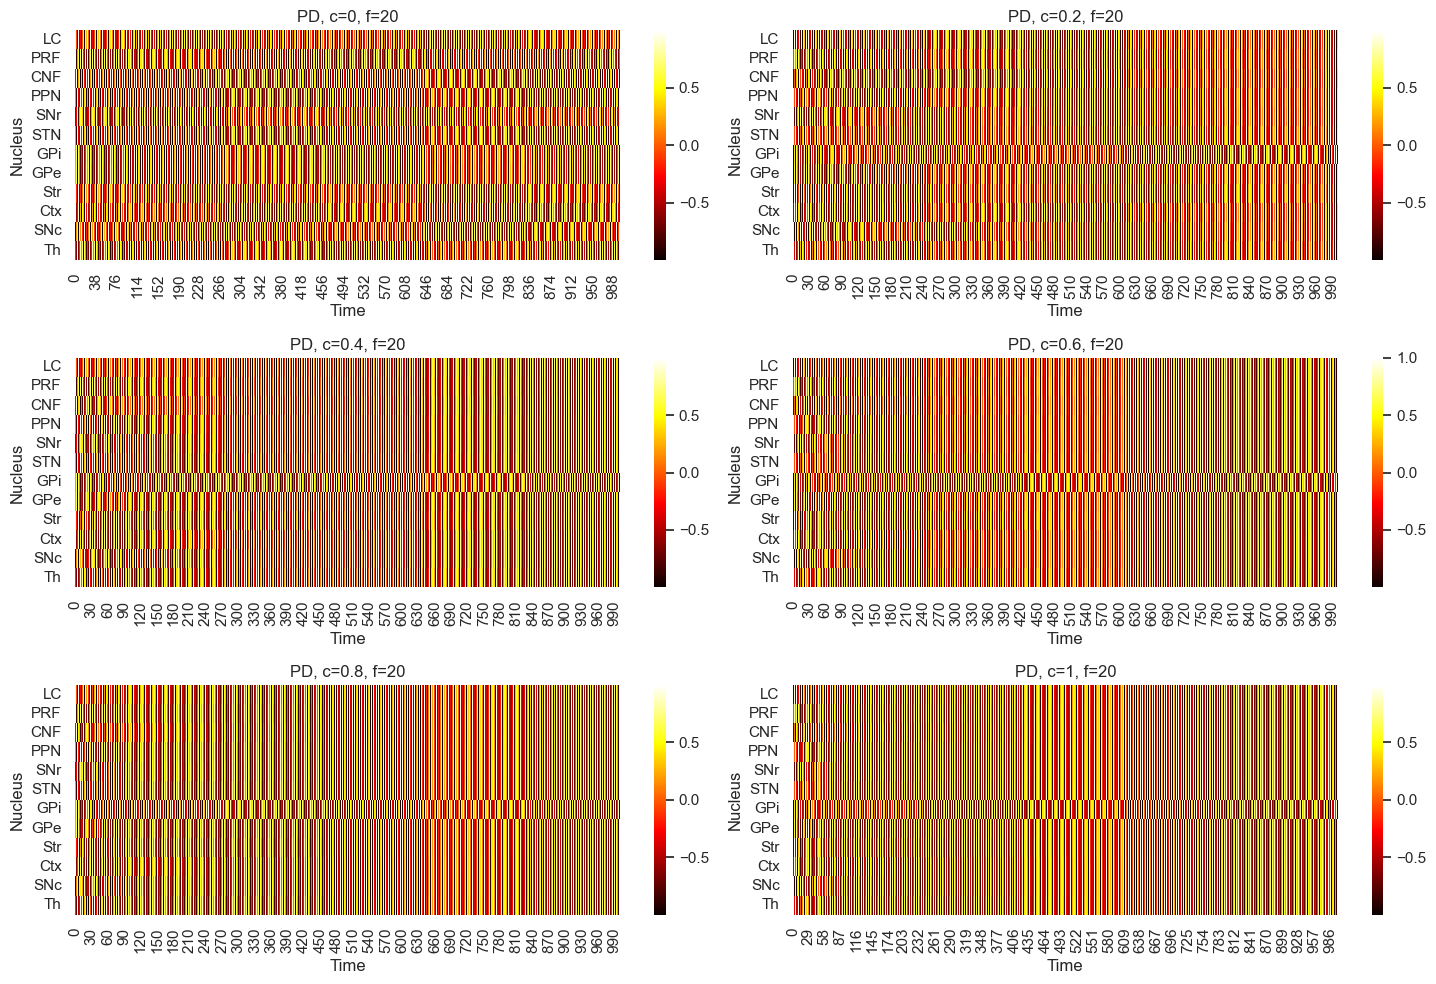

In [118]:
# PD

# coupling factors
c=coupling_factor
#initial angle
initial_angles= initial_ang


graph = d_pd
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']

plt.subplots(m, n, figsize = (15,10))
act_pd=[]
for i in range(len(c)):
    # model = Kuramoto(coupling=c[i], dt=0.001, T=100, n_nodes=len(graph), natfreqs=freq)
    # model = Kuramoto(coupling=c[i], dt=0.01, T=100, n_nodes=len(graph), natfreqs=freq)
    model = Kuramoto(coupling=c[i], dt=dt_int, T=finalTime, n_nodes=len(graph), natfreqs=freq) #mariia
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)
    activity= act_mat
    act_pd.append(act_mat)
    plt.subplot(m,n,int(i)+1)
    sns.heatmap(np.sin(activity), yticklabels=y_axis_labels,
                   cmap='hot').set(title='PD, c={0}, f={1}'.format(c[i],f),
                                           ylabel='Nucleus',
                                           xlabel='Time')
    plt.yticks(rotation=0)
    plt.tight_layout()


# order parameter

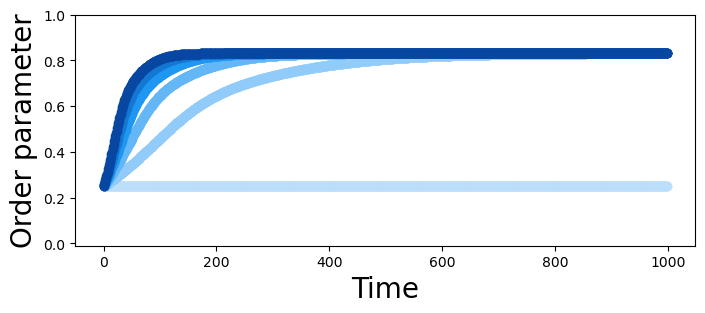

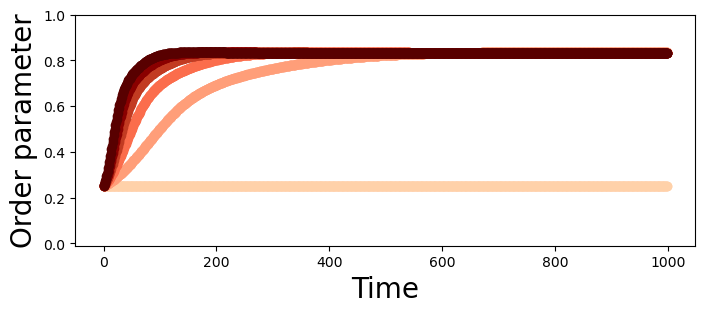

In [38]:
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity

#blue hex codes: Healthy
a='#bbdffb'
b='#90cbf9'
c='#64b7f6'
d='#1e97f3'
e='#1477d2'
f='#0747a1'
#red hex codes: PD
g='#FFD1A9'
h='#FF9E79'
j='#FB6D4C'
k='#C23B22'
l='#8A0000'
m='#580000'
white_to_blues=[a,b,c,d,e,f]
white_to_reds=[g,h,j,k,l,m]

with sns.color_palette(white_to_blues,n_colors=len(act_h)):
    plot_phase_coherence(np.array(act_h))

with sns.color_palette(white_to_reds,n_colors=len(act_pd)):
    plot_phase_coherence(np.array(act_pd))

In [40]:
This code snippet is critical in computational models of synchronization and 
collective behavior in networks of oscillators.
It allows researchers to quantify how synchronized the phases of the oscillators are at a given time step.

def phase_coherence(angles_vec):
    '''
    Compute global order parameter R_t - mean length of resultant vector
    '''
    suma = sum([(np.e ** (1j * i)) for i in angles_vec])
    return abs(suma / len(angles_vec))

SyntaxError: invalid syntax (1831381482.py, line 1)

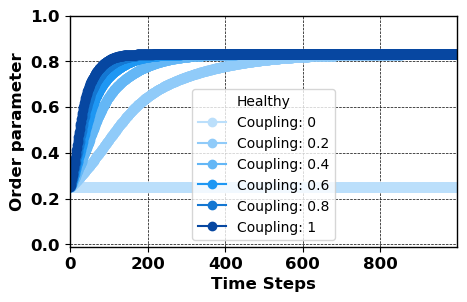

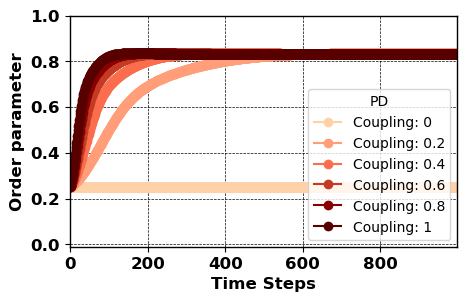

In [63]:
white_to_blues = ['#bbdffb', '#90cbf9', '#64b7f6', '#1e97f3', '#1477d2', '#0747a1']
white_to_reds=['#FFD1A9','#FF9E79','#FB6D4C','#C23B22','#8A0000','#580000']
def phase_coherence(angles_vec):
    '''
    Compute global order parameter R_t - mean length of resultant vector
    '''
    suma = sum([(np.e ** (1j * i)) for i in angles_vec])
    return abs(suma / len(angles_vec))
        
def plot_phase_coherence(activity, label, ax, color):
    """
    Plot order parameter phase_coherence vs time on a single axis.

    activity: 2D-np.ndarray
        Activity time series, node vs. time.
    label: str
        Label for the plot line to be used in the legend.
    ax: matplotlib.axes.Axes
        The axis to plot on.
    color: str
        Color for the plot line.
    """
    ax.plot([phase_coherence(vec) for vec in activity.T], 'o-', label=label, color=color)
    ax.set_ylabel('Order parameter', fontsize=12, fontweight='bold')
    ax.set_xlabel('Time Steps', fontsize=12, fontweight='bold')
    ax.set_ylim((-0.01, 1))
    ax.set_xlim(-1, len(activity.T) - 1)  
    
    # Add grid lines and set grid color
    ax.grid(True, color='black', linestyle='--', linewidth=0.5)  # Set grid lines to black with dashed style
    # Set the axis borders to black
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    
    # Customize x-axis tick labels  
    ax.tick_params(axis='x', labelsize=10)  # Adjust label font size  
    for label in ax.get_xticklabels():  
        label.set_fontsize(12)  # Set font size for x-axis labels  
        label.set_weight('bold')  # Set font weight to bold  

    # Customize x-axis tick labels  
    ax.tick_params(axis='y', labelsize=10)  # Adjust label font size  
    for label in ax.get_yticklabels():  
        label.set_fontsize(12)  # Set font size for x-axis labels  
        label.set_weight('bold')  # Set font weight to bold  

# Set up a single figure and axis
fig, ax = plt.subplots(figsize=(5, 3))
fig.patch.set_facecolor('white')  # Set the figure background to white
ax.set_facecolor('white')  # Set the axes background to white
# Apply color palette and plot all datasets on the same axis
with sns.color_palette(white_to_blues, n_colors=len(act_h)):
    for activity, label, color in zip(act_h, coupling_factor, white_to_blues):
        plot_phase_coherence(activity, label=f"Coupling: {label}", ax=ax, color=color)
# Add legend and display the plot
ax.legend(title='Healthy')
# plt.title("C", fontsize=12, fontweight='bold')
plt.savefig('results/H_R.png')
plt.show()

# Set up a single figure and axis
fig, ax = plt.subplots(figsize=(5, 3))
fig.patch.set_facecolor('white')  # Set the figure background to white
ax.set_facecolor('white')  # Set the axes background to white
# Apply color palette and plot all datasets on the same axis
with sns.color_palette(white_to_reds, n_colors=len(act_pd)):
    for activity, label, color in zip(act_pd, coupling_factor, white_to_reds):
        plot_phase_coherence(activity, label=f"Coupling: {label}", ax=ax, color=color)
# Add legend and display the plot
ax.legend(title='PD', loc='lower right')
# plt.title("C", fontsize=12, fontweight='bold')
plt.savefig('results/PD_R.png')
plt.show()


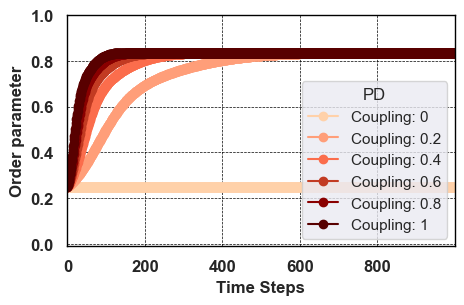

In [98]:
# Set up a single figure and axis
fig, ax = plt.subplots(figsize=(5, 3))
fig.patch.set_facecolor('white')  # Set the figure background to white
ax.set_facecolor('white')  # Set the axes background to white
# Apply color palette and plot all datasets on the same axis
with sns.color_palette(white_to_reds, n_colors=len(act_pd)):
    for activity, label, color in zip(act_pd, coupling_factor, white_to_reds):
        plot_phase_coherence(activity, label=f"Coupling: {label}", ax=ax, color=color)
# Add legend and display the plot
ax.legend(title='PD', loc='lower right')

# plt.title("C", fontsize=12, fontweight='bold')
plt.savefig('results/PD_R.png', bbox_inches='tight')
plt.show()

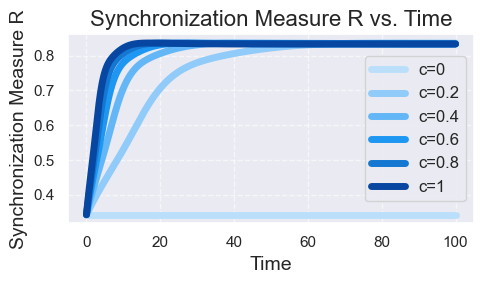

In [40]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Define your functions for calculating R and phase coherence (if not already defined):  
def calculate_order_parameter(activity):  
    n_nodes, n_time_steps = activity.shape  # Number of nodes and time points  
    Z = np.zeros(n_time_steps, dtype=complex)  # Initialize the complex sum  

    # Sum over all nodes for each time step  
    for t in range(n_time_steps):  
        Z[t] = np.sum(np.exp(1j * activity[:, t])) / n_nodes  
    
    return Z  

def calculate_synchronization_measure(activity):  
    Z = calculate_order_parameter(activity)  
    R = np.abs(Z)  # Magnitude of the order parameter  
    return R  

# Coupling factors  
c = coupling_factor  
# Initial angles  
initial_angles = initial_ang  
# Graph adjacency matrix  
graph = d_pd  

# Prepare to store metrics for plotting  
all_R_values = []  
all_phase_coherence_values = []  
all_Z_values = []  

# Run the Kuramoto model for each coupling factor and store metrics  
for i in range(len(c)):  
    # Run the Kuramoto model  
    model = Kuramoto(coupling=c[i], dt=dt_int, T=finalTime, n_nodes=len(graph), natfreqs=freq)  
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)      
    # Calculate metrics  
    R = calculate_synchronization_measure(act_mat)  
    phase_coherence = calculate_phase_coherence(act_mat)  
    Z = calculate_order_parameter(act_mat)      
    # Store the metrics for each coupling factor  
    all_R_values.append(R)  

# Plotting the metrics over time for each coupling factor  
time = np.linspace(0, finalTime, act_mat.shape[1])  # Assuming act_mat has shape (n_nodes, n_time_steps)  

# Define your color palette
white_to_blues = ['#bbdffb', '#90cbf9', '#64b7f6', '#1e97f3', '#1477d2', '#0747a1']

# Plot the synchronization measure over time for each coupling factor
plt.figure(figsize=(5,3))

# Ensure that the number of colors matches the number of coupling factors
if len(c) > len(white_to_blues):
    raise ValueError("Not enough colors in the palette for the number of coupling factors.")

# Plot R for each coupling factor with corresponding color
for i in range(len(c)):
    plt.plot(time, all_R_values[i], label=f'c={c[i]}', color=white_to_blues[i], linewidth=5)

# Customize the plot
plt.title('Synchronization Measure R vs. Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Synchronization Measure R', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


# Activity difference

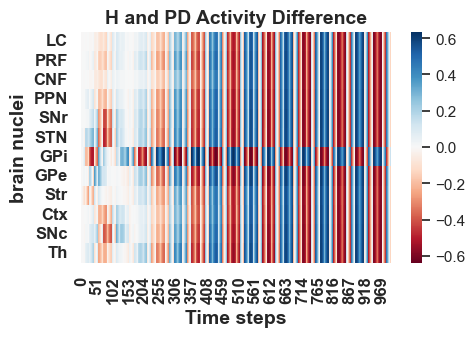

In [119]:
sns.set(rc={'figure.figsize':(5,3)})
ax=sns.heatmap(np.sin(act_h[-1])-np.sin(act_pd[-1]),cmap='RdBu',
            yticklabels=y_axis_labels);
# Customize tick labels font size and weight  
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, fontweight='bold')  # Adjust size and weight for x-ticks  
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12, fontweight='bold')  # Adjust size and weight for y-ticks  

# Add label for x-axis
ax.set_xlabel('Time steps', fontsize=14, fontweight='bold')  # Set label with desired font size and weight
ax.set_ylabel('brain nuclei', fontsize=14, fontweight='bold')  # Set label with desired font size and weight


plt.title("H and PD Activity Difference", fontsize=14, fontweight='bold')
plt.savefig('results/activity_difference.png', bbox_inches='tight')


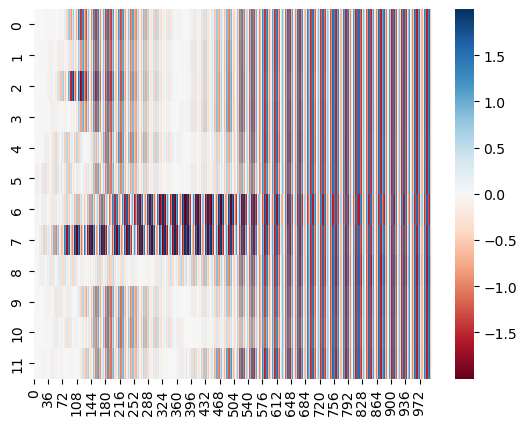

In [14]:
sns.heatmap(np.sin(act_mat_h)-np.sin(act_mat_pd),cmap='RdBu');

# phase coherence

In [56]:
def phase_coherence(angles_vec):
    '''
    Compute global order parameter R_t - mean length of resultant vector
    '''
    suma = sum([(np.e ** (1j * i)) for i in angles_vec])
    return abs(suma / len(angles_vec))


In [39]:
phase_coherence(np.array(act_pd)[-1,:])[800]

0.8333754552159754

In [40]:
phase_coherence(np.array(act_h)[-1,:])[800]

0.8331830785646905

# smaller coupling factors

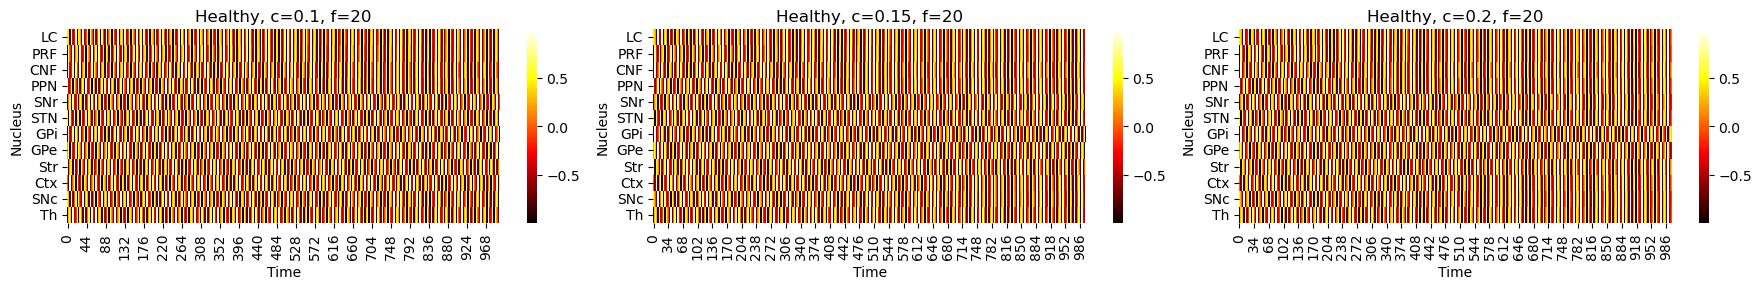

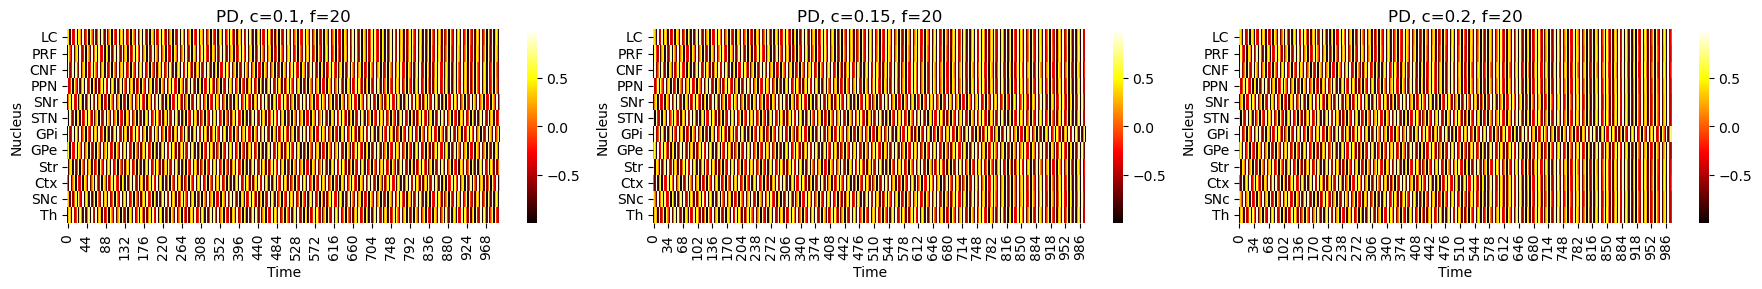

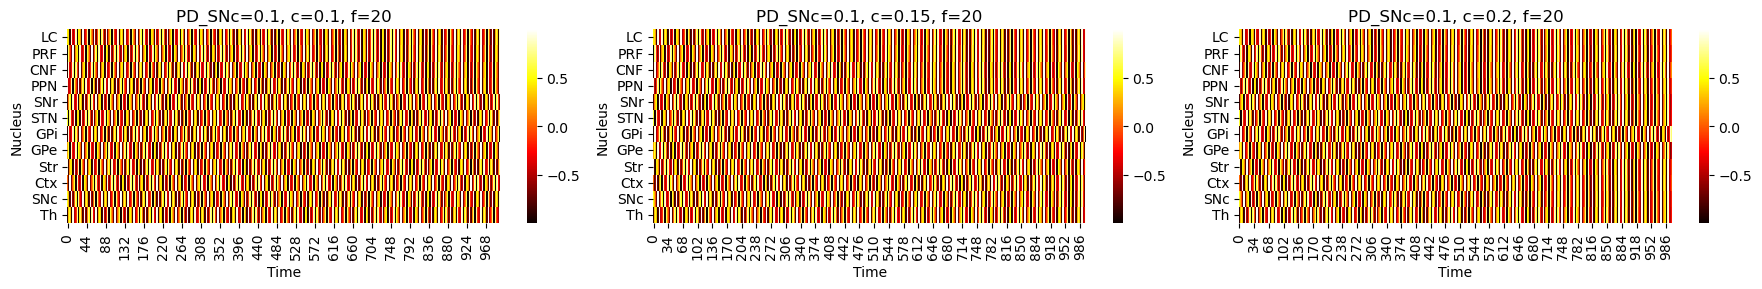

In [59]:
# following 29.09.2023 meeting

# Healthy
N=12
# coupling factors
c=[0.1, 0.15, 0.2]   #
#initial angle
initial_angles= 2* np.pi*np.random.random(N)


graph = d_h
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']
f=20
freq = np.ones(N) * f  # intrinsic frequency

#row
m=1
#column
n=3
plt.subplots(m, n, figsize = (18,3))
act_h=[]
for i in range(len(c)):
    model = Kuramoto(coupling=c[i], dt=0.1, T=100, n_nodes=len(graph), natfreqs=freq)
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)
    activity= act_mat
    act_h.append(act_mat)
    plt.subplot(m,n,int(i)+1)
    sns.heatmap(np.sin(activity), yticklabels=y_axis_labels,
                   cmap='hot').set(title='Healthy, c={0}, f={1}'.format(c[i],f),
                                           ylabel='Nucleus',
                                           xlabel='Time')
    plt.yticks(rotation=0)
    plt.tight_layout()



#######################################################################################
# PD
graph = d_pd

plt.subplots(m, n, figsize = (18,3))
act_pd=[]
for i in range(len(c)):
    model = Kuramoto(coupling=c[i], dt=0.1, T=100, n_nodes=len(graph), natfreqs=freq)
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)
    activity= act_mat
    act_pd.append(act_mat)
    plt.subplot(m,n,int(i)+1)
    sns.heatmap(np.sin(activity), yticklabels=y_axis_labels,
                   cmap='hot').set(title='PD, c={0}, f={1}'.format(c[i],f),
                                           ylabel='Nucleus',
                                           xlabel='Time')
    plt.yticks(rotation=0)
    plt.tight_layout()
########################################################################################
# PD
d_pd2= np.array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.],
       [ 0., -1., -1., -1.,  0.,  0.,  0.,  0., -1.,  0., -1., -1.],
       [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.],
       [ 0., -1.,  0., -1., -1., -1.,  0., -1., -1.,  0., -1., -1.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -1., -1., -1., -1.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0., -1., -1., -1.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.1,  0.1,  0.1,  0.1,  0.1,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.]])

# graph = d_pd
graph = d_pd2

plt.subplots(m, n, figsize = (18,3))
act_pd=[]
for i in range(len(c)):
    model = Kuramoto(coupling=c[i], dt=0.1, T=100, n_nodes=len(graph), natfreqs=freq)
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)
    activity= act_mat
    act_pd.append(act_mat)
    plt.subplot(m,n,int(i)+1)
    sns.heatmap(np.sin(activity), yticklabels=y_axis_labels,
                   cmap='hot').set(title='PD_SNc=0.1, c={0}, f={1}'.format(c[i],f),
                                           ylabel='Nucleus',
                                           xlabel='Time')
    plt.yticks(rotation=0)
    plt.tight_layout()

# start from Eq point

In [ ]:
# original KM
# start from Eq point
angle= equilibrium_h
coupling_f=0.8
N=12
graph = d_h
freq= 20*np.ones(N)
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']


plt.subplots(4, 3, figsize = (30,20))

for i in range(len(angle)):
    initial_angles= angle[i]

    model = Kuramoto(coupling=coupling_f, dt=0.1, T=100, n_nodes=len(graph), natfreqs=freq)
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)
    activity= act_mat


    # plot equilibrium points
    plt.subplot(4,3,int(i)+1)
    sns.heatmap(np.sin(activity), yticklabels=y_axis_labels,
                   cmap='hot').set(title='Healthy, c={}, f=20, initial= equilibrium {}'.format(coupling_f,i+1),
                                           ylabel='Nucleus',
                                           xlabel='Time (sec)')
    plt.tight_layout()

plt.show()



In [ ]:
# original KM
# start from Eq point
angle= equilibrium_pd
coupling_f=0.8
graph = d_pd

N=12
freq= 20*np.ones(N)
y_axis_labels =['LC','PRF','CNF','PPN',
             'SNr','STN','GPi','GPe',
             'Str','Ctx','SNc','Th']


plt.subplots(4, 3, figsize = (30,18))

for i in range(len(angle)):
    initial_angles= angle[i]

    model = Kuramoto(coupling=coupling_f, dt=0.1, T=100, n_nodes=len(graph), natfreqs=freq)
    act_mat = model.run(adj_mat=graph, angles_vec=initial_angles)
    activity= act_mat


    # plot equilibrium points
    plt.subplot(4,3,int(i)+1)
    sns.heatmap(np.sin(activity), yticklabels=y_axis_labels,
                   cmap='hot').set(title='PD, c={}, f=20, initial= equilibrium {}'.format(coupling_f,i+1),
                                           ylabel='Nucleus',
                                           xlabel='Time (sec)')
    plt.tight_layout()

plt.show()



In [ ]:
sns.heatmap(np.sin(act_mat_h)-np.sin(act_mat_pd),cmap='RdBu');